In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 1. Reading the Data Set.

In [3]:
universities_df = pd.read_excel('IPEDS_data.xlsx')
universities_df.head(10)

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid,Endowment assets (year end) per FTE enrollment (GASB),Endowment assets (year end) per FTE enrollment (FASB)
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,-86.568502,34.783368,Not applicable,Implied no,...,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0,NaN,NaN
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,-86.809170,33.502230,Not applicable,Implied no,...,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0,24136.0,NaN
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.174010,32.362609,Churches of Christ,Implied no,...,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0,NaN,302.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,-86.638420,34.722818,Not applicable,Yes,...,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0,11502.0,NaN
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.295677,32.364317,Not applicable,Implied no,...,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0,13202.0,NaN
5,100751,The University of Alabama,2013,35487-0166,Doctor's degree - research/scholarship and pro...,Tuscaloosa County,-87.545766,33.214400,Not applicable,Implied no,...,20.0,18.0,4.0,3.0,50.0,42.0,41.0,8.0,19469.0,NaN
6,100812,Athens State University,2013,35611,Bachelor's degree,Limestone County,-86.965140,34.805625,Not applicable,Implied no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,854.0,NaN
7,100830,Auburn University at Montgomery,2013,36117-3596,Doctor's degree - research/scholarship,Montgomery County,-86.177351,32.369939,Not applicable,Implied no,...,48.0,48.0,5.0,5.0,48.0,36.0,36.0,0.0,10736.0,NaN
8,100858,Auburn University,2013,36849,Doctor's degree - research/scholarship and pro...,Lee County,-85.492409,32.600201,Not applicable,Implied no,...,13.0,13.0,3.0,1.0,65.0,32.0,31.0,3.0,22092.0,NaN
9,100937,Birmingham Southern College,2013,35254,Bachelor's degree,Jefferson County,-86.853636,33.515453,United Methodist,Implied no,...,21.0,21.0,9.0,26.0,96.0,80.0,80.0,7.0,NaN,37598.0


In [4]:
print('the dataset have {} rows and {} columns'.format(universities_df.shape[0],universities_df.shape[1]))

the dataset have 1534 rows and 145 columns


In [5]:
# 2. Data Treatment: Cleaning and Formatting.

In [6]:
# 2.1 Working with missing, incorrect, and invalid data

In [7]:
# Missing values (NaN values)
# count number of NaN in each column

In [8]:
universities_df.isna().sum().sort_values(ascending=False)

Endowment assets (year end) per FTE enrollment (GASB)      1018
SAT Writing 25th percentile score                           820
SAT Writing 75th percentile score                           820
Number of first-time undergraduates - foreign countries     623
Percent of first-time undergraduates - out-of-state         623
                                                           ... 
Level of institution                                          0
Control of institution                                        0
Historically Black College or University                      0
Tribal college                                                0
State abbreviation                                            0
Length: 145, dtype: int64

In [9]:
len(universities_df)

1534

In [10]:
perc_nan = universities_df.isna().sum()/len(universities_df)*100
perc_nan

ID number                                                 0.000000
Name                                                      0.000000
year                                                      0.000000
ZIP code                                                  0.000000
Highest degree offered                                    0.000000
                                                           ...    
Percent of freshmen receiving student loan aid            2.737940
Percent of freshmen receiving federal student loans       2.737940
Percent of freshmen receiving other loan aid              2.737940
Endowment assets (year end) per FTE enrollment (GASB)    66.362451
Endowment assets (year end) per FTE enrollment (FASB)    37.418514
Length: 145, dtype: float64

Text(0, 0.5, '% of NaN elements')

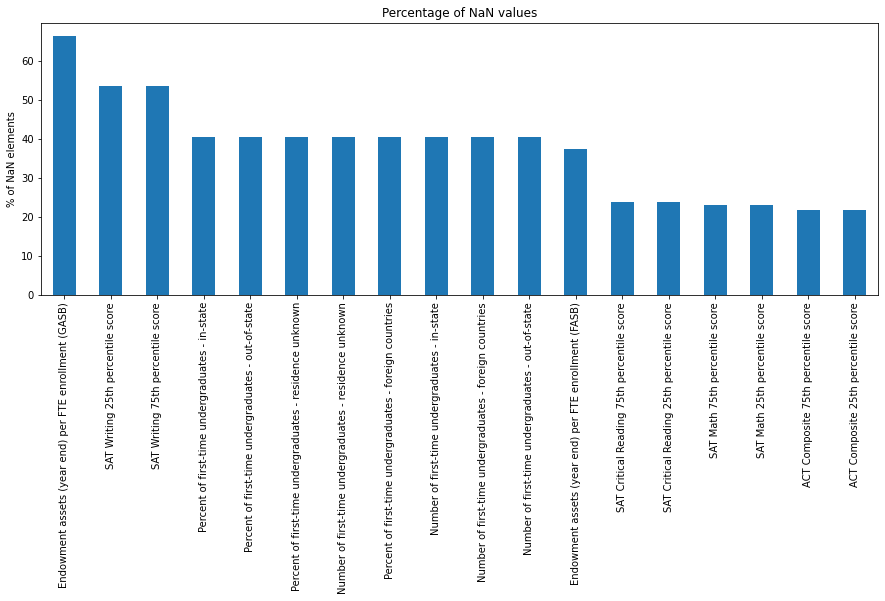

In [11]:
ax=perc_nan[perc_nan>=20].sort_values(ascending=False).plot.bar(title='Percentage of NaN values',figsize=(15,5))
ax.set_ylabel('% of NaN elements')

In [12]:
colum_off=universities_df.isna().sum()[universities_df.isna().sum()>=(0.2*len(universities_df))]
list_colum_off=colum_off.index.to_list()

In [13]:
universitiesnw_df=universities_df.copy()

In [14]:
universitiesnw_df.drop(list_colum_off,axis=1,inplace=True)

In [15]:
universitiesnw_df.head(10)

,ID number,Name,year,ZIP code,Highest degree offered,County name,Longitude location of institution,Latitude location of institution,Religious affiliation,Offers Less than one year certificate,...,Percent of freshmen receiving any financial aid,"Percent of freshmen receiving federal, state, local or institutional grant aid",Percent of freshmen receiving federal grant aid,Percent of freshmen receiving Pell grants,Percent of freshmen receiving other federal grant aid,Percent of freshmen receiving state/local grant aid,Percent of freshmen receiving institutional grant aid,Percent of freshmen receiving student loan aid,Percent of freshmen receiving federal student loans,Percent of freshmen receiving other loan aid
0,100654,Alabama A & M University,2013,35762,Doctor's degree - research/scholarship,Madison County,-86.568502,34.783368,Not applicable,Implied no,...,97.0,89.0,81.0,81.0,7.0,1.0,32.0,89.0,89.0,1.0
1,100663,University of Alabama at Birmingham,2013,35294-0110,Doctor's degree - research/scholarship and pro...,Jefferson County,-86.809170,33.502230,Not applicable,Implied no,...,90.0,79.0,36.0,36.0,10.0,0.0,60.0,56.0,55.0,5.0
2,100690,Amridge University,2013,36117-3553,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.174010,32.362609,Churches of Christ,Implied no,...,100.0,90.0,90.0,90.0,0.0,40.0,90.0,100.0,100.0,0.0
3,100706,University of Alabama in Huntsville,2013,35899,Doctor's degree - research/scholarship and pro...,Madison County,-86.638420,34.722818,Not applicable,Yes,...,87.0,77.0,31.0,31.0,4.0,1.0,63.0,46.0,46.0,3.0
4,100724,Alabama State University,2013,36104-0271,Doctor's degree - research/scholarship and pro...,Montgomery County,-86.295677,32.364317,Not applicable,Implied no,...,93.0,87.0,76.0,76.0,13.0,11.0,34.0,81.0,81.0,0.0
5,100751,The University of Alabama,2013,35487-0166,Doctor's degree - research/scholarship and pro...,Tuscaloosa County,-87.545766,33.214400,Not applicable,Implied no,...,75.0,60.0,20.0,18.0,4.0,3.0,50.0,42.0,41.0,8.0
6,100812,Athens State University,2013,35611,Bachelor's degree,Limestone County,-86.965140,34.805625,Not applicable,Implied no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,100830,Auburn University at Montgomery,2013,36117-3596,Doctor's degree - research/scholarship,Montgomery County,-86.177351,32.369939,Not applicable,Implied no,...,90.0,67.0,48.0,48.0,5.0,5.0,48.0,36.0,36.0,0.0
8,100858,Auburn University,2013,36849,Doctor's degree - research/scholarship and pro...,Lee County,-85.492409,32.600201,Not applicable,Implied no,...,76.0,68.0,13.0,13.0,3.0,1.0,65.0,32.0,31.0,3.0
9,100937,Birmingham Southern College,2013,35254,Bachelor's degree,Jefferson County,-86.853636,33.515453,United Methodist,Implied no,...,98.0,97.0,21.0,21.0,9.0,26.0,96.0,80.0,80.0,7.0


In [16]:
interesting_columns=['Name', 'year', 'Highest degree offered', "Offers Bachelor's degree",
       "Offers Master's degree",
       "Offers Doctor's degree - research/scholarship",
       "Offers Doctor's degree - professional practice", 'Applicants total',
       'Admissions total', 'Enrolled total', 'Estimated enrollment, total',
       'Tuition and fees, 2013-14',
       'Total price for in-state students living on campus 2013-14',
       'Total price for out-of-state students living on campus 2013-14',
       'State abbreviation', 'Control of institution', 'Total  enrollment',
       'Full-time enrollment', 'Part-time enrollment',
       'Undergraduate enrollment', 'Graduate enrollment',
       'Full-time undergraduate enrollment',
       'Part-time undergraduate enrollment',
       'Percent of total enrollment that are women',
       'Percent of undergraduate enrollment that are women',
       'Percent of graduate enrollment that are women',
       'Graduation rate - Bachelor degree within 4 years, total',
       'Graduation rate - Bachelor degree within 5 years, total',
       'Graduation rate - Bachelor degree within 6 years, total',
       ]

In [17]:
universitiesnw_df = universitiesnw_df[interesting_columns]

In [18]:
universitiesnw_df

,Name,year,Highest degree offered,Offers Bachelor's degree,Offers Master's degree,Offers Doctor's degree - research/scholarship,Offers Doctor's degree - professional practice,Applicants total,Admissions total,Enrolled total,...,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are women,Percent of undergraduate enrollment that are women,Percent of graduate enrollment that are women,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total"
0,Alabama A & M University,2013,Doctor's degree - research/scholarship,Yes,Yes,Yes,Implied no,6142.0,5521.0,1104.0,...,4051.0,969.0,3799.0,252.0,55.0,51.0,69.0,10.0,23.0,29.0
1,University of Alabama at Birmingham,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,5689.0,4934.0,1773.0,...,11502.0,7066.0,8357.0,3145.0,61.0,58.0,64.0,29.0,46.0,53.0
2,Amridge University,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,...,322.0,309.0,202.0,120.0,58.0,61.0,55.0,0.0,0.0,67.0
3,University of Alabama in Huntsville,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,2054.0,1656.0,651.0,...,5696.0,1680.0,4237.0,1459.0,44.0,44.0,43.0,16.0,37.0,48.0
4,Alabama State University,2013,Doctor's degree - research/scholarship and pro...,Yes,Yes,Yes,Yes,10245.0,5251.0,1479.0,...,5356.0,719.0,4872.0,484.0,61.0,59.0,71.0,9.0,19.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1529,University of South Florida-Sarasota-Manatee,2013,Master's degree,Yes,Yes,Implied no,Implied no,393.0,136.0,86.0,...,1728.0,149.0,837.0,891.0,60.0,59.0,65.0,NaN,NaN,NaN
1530,The Kingâ€™s College,2013,Bachelor's degree,Yes,Implied no,Implied no,Implied no,3033.0,2158.0,127.0,...,516.0,0.0,493.0,23.0,60.0,60.0,NaN,57.0,61.0,61.0
1531,Ottawa University-Online,2013,Master's degree,Yes,Yes,Implied no,Implied no,NaN,NaN,NaN,...,383.0,75.0,1.0,382.0,61.0,61.0,60.0,NaN,NaN,NaN
1532,Providence Christian College,2013,Bachelor's degree,Yes,Implied no,Implied no,Implied no,122.0,65.0,20.0,...,66.0,0.0,66.0,0.0,52.0,52.0,NaN,46.0,54.0,54.0


In [19]:
# total  enrollment 2 space, dataset lừa ^^

In [20]:
universitiesnw_df[universitiesnw_df['Total  enrollment'].isna()][['Name','Applicants total','Admissions total','Enrolled total','Total  enrollment']]

,Name,Applicants total,Admissions total,Enrolled total,Total enrollment
257,University of North Georgia,NaN,NaN,NaN,NaN
1308,Texas A & M University-Galveston,NaN,NaN,NaN,NaN


In [21]:
# axis = 0 -> cột; axis = 1 -> hàng

In [22]:
a=universitiesnw_df[universitiesnw_df['Name']=='University of North Georgia'].index[0]
b=universitiesnw_df[universitiesnw_df['Name']=='Texas A & M University-Galveston'].index[0]
universitiesnw_df=universitiesnw_df.drop([a,b],axis=0)

In [23]:
print('The data frame now has {} columns out of the {} original columns, and {} rows out of the {} original rows.'.format(universitiesnw_df.shape[1],universities_df.shape[1],universitiesnw_df.shape[0],universities_df.shape[0]))

The data frame now has 29 columns out of the 145 original columns, and 1532 rows out of the 1534 original rows.


In [24]:
# -Invalid values
# chọn những thằng số nguyên hoặc số thực thì dùng select_dtypes(include=['float64','int64'])
# tìm xem thằng nào âm thì loại bỏ

In [25]:
col=universitiesnw_df.select_dtypes(include=['float64','int64']).columns

In [26]:
lt=list()
for i in col:
    y=any(x < 0 for x in universitiesnw_df[i])
    if y==True:
        lt.append(y)
print('There are {} negative values in the data frame.'.format(len(lt)))

There are 0 negative values in the data frame.


In [27]:
# -> dataset không chứa negative invalid value

In [28]:
# -Inconsistent values

In [29]:
universitiesnw_df.describe()

,year,Applicants total,Admissions total,Enrolled total,"Estimated enrollment, total","Tuition and fees, 2013-14",Total price for in-state students living on campus 2013-14,Total price for out-of-state students living on campus 2013-14,Total enrollment,Full-time enrollment,...,Undergraduate enrollment,Graduate enrollment,Full-time undergraduate enrollment,Part-time undergraduate enrollment,Percent of total enrollment that are women,Percent of undergraduate enrollment that are women,Percent of graduate enrollment that are women,"Graduation rate - Bachelor degree within 4 years, total","Graduation rate - Bachelor degree within 5 years, total","Graduation rate - Bachelor degree within 6 years, total"
count,1532.0,1377.000000,1377.000000,1377.000000,1532.000000,1497.000000,1400.000000,1400.000000,1532.000000,1532.000000,...,1532.000000,1532.000000,1532.000000,1532.000000,1532.000000,1522.000000,1269.000000,1476.000000,1476.000000,1476.000000
mean,2013.0,6391.193174,3554.880174,1043.046478,7033.115535,20727.490314,34935.306429,38767.612857,7070.114230,5371.494125,...,5532.885117,1537.229112,4507.738903,1025.146214,57.911227,57.169514,63.109535,37.450542,49.788618,53.189024
std,0.0,8787.469171,4309.457606,1285.165519,9387.648898,12455.805360,13283.049319,10716.524007,9416.538854,7474.494963,...,7242.649546,2765.197979,6042.192662,2121.495422,11.784477,11.886220,14.147092,21.949856,20.256726,19.102511
min,2013.0,0.000000,0.000000,0.000000,68.000000,1032.000000,9768.000000,9768.000000,66.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2013.0,1488.000000,950.000000,287.000000,1497.250000,8542.000000,22487.000000,31128.000000,1512.750000,1199.000000,...,1328.000000,46.750000,1089.500000,87.000000,52.000000,52.000000,55.000000,20.000000,36.000000,40.000000
50%,2013.0,3350.000000,2056.000000,538.000000,3126.000000,20060.000000,34115.000000,37193.500000,3127.000000,2328.000000,...,2487.500000,471.000000,2066.000000,320.500000,58.000000,57.000000,64.000000,34.000000,49.000000,52.500000
75%,2013.0,7016.000000,4203.000000,1246.000000,8376.000000,29992.000000,44835.750000,45907.500000,8376.250000,6080.750000,...,6394.000000,1737.000000,5207.500000,1082.250000,63.000000,62.000000,72.000000,52.250000,63.000000,66.000000
max,2013.0,72676.000000,35815.000000,10241.000000,79576.000000,49138.000000,64988.000000,64988.000000,77338.000000,50012.000000,...,51333.000000,29874.000000,40020.000000,37440.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [30]:
# According to the description chart, there are some universities which, for example,
# in 2013, had 0 applications in total, 0 admissions in total, and 0 enrollments in total (xem hàng min -> 2013 ko gì hết)
# These are inconsistent values, and they need to be handled.

In [31]:
total_zero=(universitiesnw_df[universitiesnw_df.loc[0:]==0]).count().sum()

In [32]:
print('This data set contains {} zero values.'.format(total_zero))

This data set contains 395 zero values.


In [33]:
universitiesnw_df.replace(0,np.nan,inplace=True)

In [34]:
total_zero_nw=universitiesnw_df[universitiesnw_df.loc[0:]==0].count().sum()

In [35]:
print('This data set contains {} zero values.'.format(total_zero_nw))

This data set contains 0 zero values.


In [36]:
universitiesnw_df[['Name','Applicants total']].sort_values('Applicants total').head()

,Name,Applicants total
1343,Goddard College,4.0
331,Shimer College,28.0
1500,Trine University-Regional/Non-Traditional Camp...,33.0
1479,Brandman University,34.0
1046,Marylhurst University,36.0


In [37]:
# remove some special characters
# apostrophe ', hyphen -, quotation marks ", colon :, and slash /

In [38]:
def remove_space(list_headers,charact): #charact should be: charact=[' - ',' ']
    new_headers=list()
    for header in list_headers:
        for char in charact:      
            if char in header:
                header=header.replace(char,'_')
            header=header
        new_headers.append(header)
    return new_headers

In [39]:
def remove_sp_char(headers,chars):
    new_headers=list()
    for header in headers:    
        for char in chars:
            if char=='-' or char=='/':
                header=header.replace(char,'_')
            if char in header:
                header=header.replace(char,'')
            header=header   
        new_headers.append(header)
    return new_headers    

In [40]:
# change capitalized letters to avoid a typo of this kind.

In [41]:
universitiesnw_df.columns=remove_space(universitiesnw_df.columns,['-',' '])

In [42]:
universitiesnw_df.columns=remove_sp_char(universitiesnw_df.columns,["'",',',':','-','/'])

In [43]:
list_new_header=list()

for header in universitiesnw_df.columns:
    header=header.casefold()   # All capitalized letters are changed.
    
    if "degrese" in header:    # One column name has a typo.  
        header=header.replace("degrese",'degrees')
            
    list_new_header.append(header)

In [44]:
universitiesnw_df.describe()

,year,Applicants_total,Admissions_total,Enrolled_total,Estimated_enrollment_total,Tuition_and_fees_2013_14,Total_price_for_in_state_students_living_on_campus_2013_14,Total_price_for_out_of_state_students_living_on_campus_2013_14,Total__enrollment,Full_time_enrollment,...,Undergraduate_enrollment,Graduate_enrollment,Full_time_undergraduate_enrollment,Part_time_undergraduate_enrollment,Percent_of_total_enrollment_that_are_women,Percent_of_undergraduate_enrollment_that_are_women,Percent_of_graduate_enrollment_that_are_women,Graduation_rate___Bachelor_degree_within_4_years_total,Graduation_rate___Bachelor_degree_within_5_years_total,Graduation_rate___Bachelor_degree_within_6_years_total
count,1532.0,1376.000000,1376.000000,1376.000000,1532.000000,1497.000000,1400.000000,1400.000000,1532.000000,1530.000000,...,1522.000000,1269.000000,1519.000000,1495.000000,1529.000000,1518.000000,1268.000000,1457.000000,1468.000000,1469.000000
mean,2013.0,6395.837936,3557.463663,1043.804506,7033.115535,20727.490314,34935.306429,38767.612857,7070.114230,5378.515686,...,5569.237845,1855.819543,4546.317314,1050.517726,58.024853,57.320158,63.159306,37.938916,50.059946,53.442478
std,0.0,8788.972944,4309.957540,1285.324785,9387.648898,12455.805360,13283.049319,10716.524007,9416.538854,7476.855128,...,7252.465825,2939.482145,6053.531083,2141.386454,11.512998,11.533174,14.041089,21.668924,19.974502,18.790730
min,2013.0,4.000000,4.000000,2.000000,68.000000,1032.000000,9768.000000,9768.000000,66.000000,1.000000,...,11.000000,1.000000,1.000000,2.000000,3.000000,8.000000,9.000000,1.000000,2.000000,2.000000
25%,2013.0,1491.750000,951.500000,287.000000,1497.250000,8542.000000,22487.000000,31128.000000,1512.750000,1200.750000,...,1347.000000,216.000000,1119.500000,98.500000,52.000000,52.000000,55.000000,21.000000,36.000000,41.000000
50%,2013.0,3360.000000,2056.000000,538.000000,3126.000000,20060.000000,34115.000000,37193.500000,3127.000000,2331.500000,...,2516.500000,728.000000,2087.000000,336.000000,58.000000,57.000000,64.000000,34.000000,49.000000,53.000000
75%,2013.0,7020.500000,4207.500000,1246.500000,8376.000000,29992.000000,44835.750000,45907.500000,8376.250000,6094.250000,...,6443.000000,2180.000000,5251.500000,1101.500000,63.000000,62.000000,72.000000,53.000000,63.250000,66.000000
max,2013.0,72676.000000,35815.000000,10241.000000,79576.000000,49138.000000,64988.000000,64988.000000,77338.000000,50012.000000,...,51333.000000,29874.000000,40020.000000,37440.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [45]:
# Exploratory Data Analysis (EDA) and Visualization

In [46]:
from IPython.display import display
with pd.option_context('display.max_columns',None):
    display(universitiesnw_df.describe())

,year,Applicants_total,Admissions_total,Enrolled_total,Estimated_enrollment_total,Tuition_and_fees_2013_14,Total_price_for_in_state_students_living_on_campus_2013_14,Total_price_for_out_of_state_students_living_on_campus_2013_14,Total__enrollment,Full_time_enrollment,Part_time_enrollment,Undergraduate_enrollment,Graduate_enrollment,Full_time_undergraduate_enrollment,Part_time_undergraduate_enrollment,Percent_of_total_enrollment_that_are_women,Percent_of_undergraduate_enrollment_that_are_women,Percent_of_graduate_enrollment_that_are_women,Graduation_rate___Bachelor_degree_within_4_years_total,Graduation_rate___Bachelor_degree_within_5_years_total,Graduation_rate___Bachelor_degree_within_6_years_total
count,1532.0,1376.000000,1376.000000,1376.000000,1532.000000,1497.000000,1400.000000,1400.000000,1532.000000,1530.000000,1507.000000,1522.000000,1269.000000,1519.000000,1495.000000,1529.000000,1518.000000,1268.000000,1457.000000,1468.000000,1469.000000
mean,2013.0,6395.837936,3557.463663,1043.804506,7033.115535,20727.490314,34935.306429,38767.612857,7070.114230,5378.515686,1726.798938,5569.237845,1855.819543,4546.317314,1050.517726,58.024853,57.320158,63.159306,37.938916,50.059946,53.442478
std,0.0,8788.972944,4309.957540,1285.324785,9387.648898,12455.805360,13283.049319,10716.524007,9416.538854,7476.855128,2937.942843,7252.465825,2939.482145,6053.531083,2141.386454,11.512998,11.533174,14.041089,21.668924,19.974502,18.790730
min,2013.0,4.000000,4.000000,2.000000,68.000000,1032.000000,9768.000000,9768.000000,66.000000,1.000000,2.000000,11.000000,1.000000,1.000000,2.000000,3.000000,8.000000,9.000000,1.000000,2.000000,2.000000
25%,2013.0,1491.750000,951.500000,287.000000,1497.250000,8542.000000,22487.000000,31128.000000,1512.750000,1200.750000,186.000000,1347.000000,216.000000,1119.500000,98.500000,52.000000,52.000000,55.000000,21.000000,36.000000,41.000000
50%,2013.0,3360.000000,2056.000000,538.000000,3126.000000,20060.000000,34115.000000,37193.500000,3127.000000,2331.500000,695.000000,2516.500000,728.000000,2087.000000,336.000000,58.000000,57.000000,64.000000,34.000000,49.000000,53.000000
75%,2013.0,7020.500000,4207.500000,1246.500000,8376.000000,29992.000000,44835.750000,45907.500000,8376.250000,6094.250000,2112.500000,6443.000000,2180.000000,5251.500000,1101.500000,63.000000,62.000000,72.000000,53.000000,63.250000,66.000000
max,2013.0,72676.000000,35815.000000,10241.000000,79576.000000,49138.000000,64988.000000,64988.000000,77338.000000,50012.000000,40985.000000,51333.000000,29874.000000,40020.000000,37440.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [47]:
high_app_df=universitiesnw_df[['Name','Applicants_total']].sort_values('Applicants_total',ascending=False).head(20)
high_app_df

,Name,Applicants_total
84,University of California-Los Angeles,72676.0
81,University of California-Berkeley,61717.0
86,University of California-San Diego,60832.0
841,New York University,57845.0
83,University of California-Irvine,56515.0
87,University of California-Santa Barbara,55258.0
77,California State University-Long Beach,55019.0
863,St John's University-New York,51634.0
126,San Diego State University,51163.0
82,University of California-Davis,49820.0


Text(0, 0.5, '')

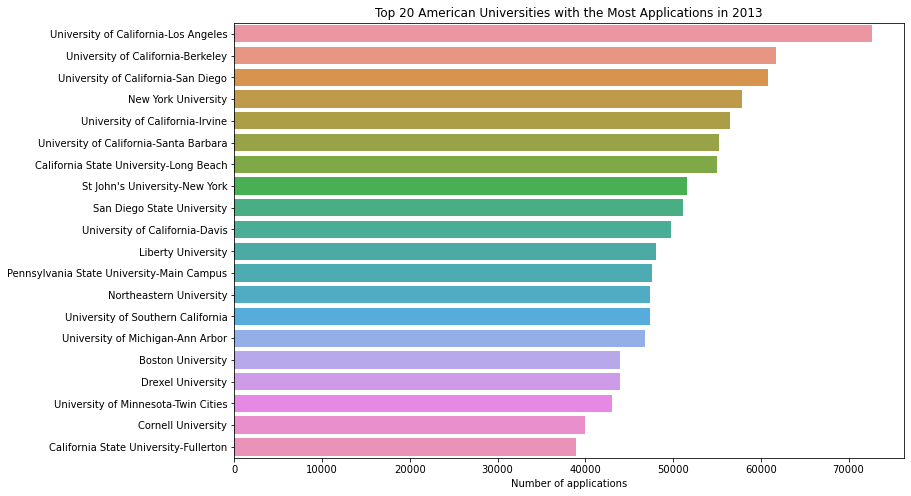

In [48]:
plt.figure(figsize=(12,8))
sns.barplot(x='Applicants_total',y='Name',data=high_app_df)
plt.title('Top 20 American Universities with the Most Applications in 2013')
plt.xlabel('Number of applications')
plt.ylabel('')

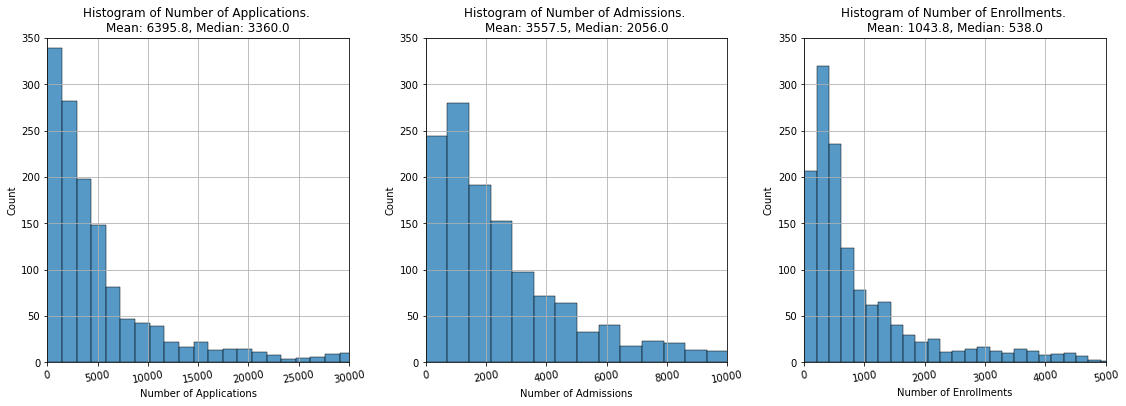

In [49]:
plt.figure(figsize=(16,6))

plt.subplot(1,3,1)
sns.histplot(universitiesnw_df.Applicants_total,bins=50)
plt.title('''Histogram of Number of Applications. 
Mean: {:.1f}, Median: {:.1f}'''.format(universitiesnw_df.Applicants_total.mean(),universitiesnw_df.Applicants_total.median()));
plt.xlabel('Number of Applications')
plt.xticks(rotation=10)
plt.axis([0,30000,0,350])
plt.grid()

plt.subplot(1,3,2)
sns.histplot(universitiesnw_df.Admissions_total,bins=50)
plt.title('''Histogram of Number of Admissions. 
Mean: {:.1f}, Median: {:.1f}'''.format(universitiesnw_df.Admissions_total.mean(),universitiesnw_df.Admissions_total.median()));
plt.axis([0,10000,0,350])
plt.xlabel('Number of Admissions')
plt.xticks(rotation=10)
plt.grid()

plt.subplot(1,3,3)
sns.histplot(universitiesnw_df.Enrolled_total,bins=50)
plt.title('''Histogram of Number of Enrollments. 
Mean: {:.1f}, Median: {:.1f}'''.format(universitiesnw_df.Enrolled_total.mean(),universitiesnw_df.Enrolled_total.median()));
plt.axis([0,5000,0,350])
plt.xlabel('Number of Enrollments')
plt.grid() # kẻ caro của nền biểu đồ
plt.xticks(rotation=10) # chỉnh các thông số trên trục x, rotation -> góc lệch của số enrollment
plt.tight_layout(pad=2);

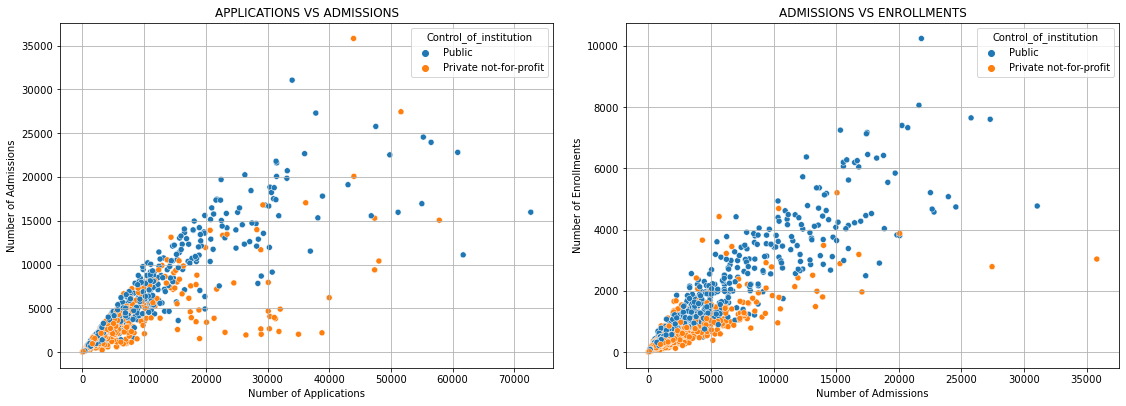

In [50]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title('APPLICATIONS VS ADMISSIONS')
sns.scatterplot(y=universitiesnw_df.Admissions_total,x=universitiesnw_df.Applicants_total,hue=universitiesnw_df.Control_of_institution)
plt.ylabel('Number of Admissions')
plt.xlabel('Number of Applications')
plt.grid()

plt.subplot(1,2,2)
plt.title('ADMISSIONS VS ENROLLMENTS')
sns.scatterplot(x='Admissions_total',y='Enrolled_total',data=universitiesnw_df,hue='Control_of_institution')
plt.ylabel('Number of Enrollments')
plt.xlabel('Number of Admissions')
plt.grid()

plt.tight_layout(pad=2)

In [51]:
universitiesnw_df['acceptance_rate']=(universitiesnw_df.Admissions_total/universitiesnw_df.Applicants_total*100).round(2)

In [52]:
universitiesnw_df['enrollment_rate']=(universitiesnw_df.Enrolled_total/universitiesnw_df.Admissions_total*100).round(2)

Text(0.5, 0, 'Number of Applications')

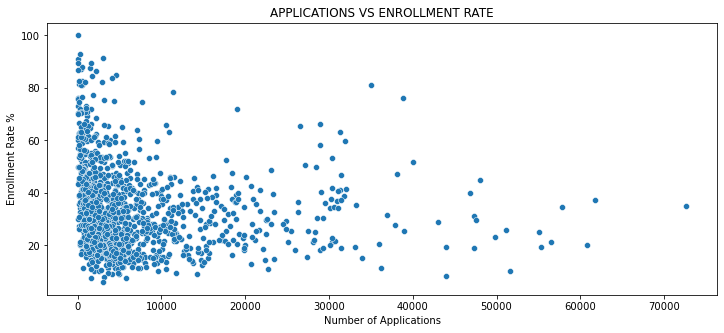

In [53]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Applicants_total',y='enrollment_rate',data=universitiesnw_df)
plt.title('APPLICATIONS VS ENROLLMENT RATE')
plt.ylabel('Enrollment Rate %')
plt.xlabel('Number of Applications')

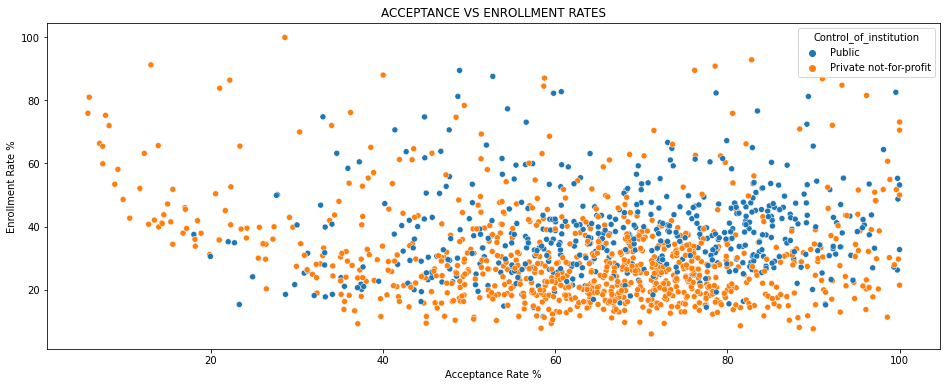

In [54]:
plt.figure(figsize=(16,6))
sns.scatterplot(x='acceptance_rate',y='enrollment_rate',data=universitiesnw_df,hue=universitiesnw_df.Control_of_institution)
plt.title('ACCEPTANCE VS ENROLLMENT RATES')
plt.ylabel('Enrollment Rate %')
plt.xlabel('Acceptance Rate %');

In [55]:
high_acceptance=universitiesnw_df[universitiesnw_df.acceptance_rate.notnull()][['Name','acceptance_rate','enrollment_rate']].sort_values('acceptance_rate',ascending=False).head(25)

In [56]:
high_acceptance

,Name,acceptance_rate,enrollment_rate
451,University of Pikeville,100.00,21.40
633,Metropolitan State University,100.00,32.68
1479,Brandman University,100.00,70.59
95,Coleman University,100.00,73.17
1343,Goddard College,100.00,50.00
709,Montana State University-Northern,100.00,53.19
1385,Southern Virginia University,99.87,29.66
1313,The University of Texas at El Paso,99.81,48.70
281,Lewis-Clark State College,99.77,55.30
799,College of Staten Island CUNY,99.75,26.19


In [57]:
low_acceptance=universitiesnw_df[universitiesnw_df.acceptance_rate.notnull()][['Name','acceptance_rate','enrollment_rate']].sort_values('acceptance_rate',ascending=False).tail(25)
low_acceptance

,Name,acceptance_rate,enrollment_rate
796,Cornell University,15.56,51.80
698,Washington University in St Louis,15.55,34.37
320,Northwestern University,15.32,41.47
481,Bowdoin College,14.95,47.15
122,Pitzer College,14.51,43.72
1158,Swarthmore College,14.32,40.97
522,Amherst College,14.28,41.17
124,Pomona College,13.92,39.86
663,Rust College,13.86,65.68
910,Duke University,13.42,42.04


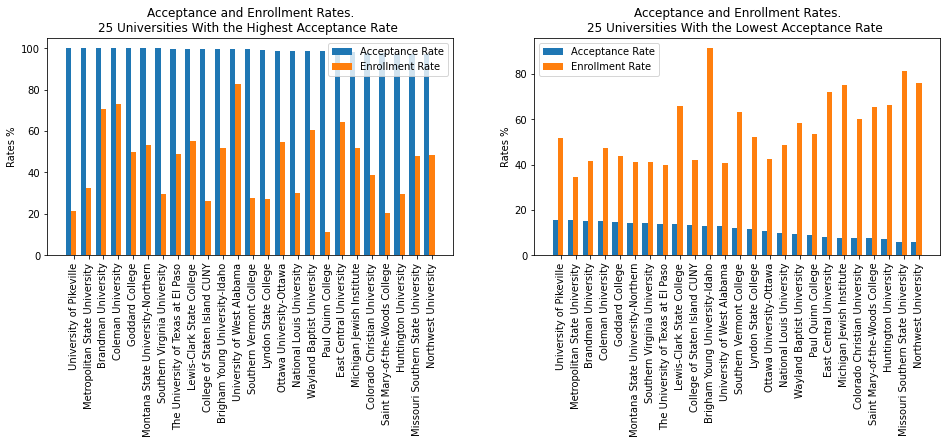

In [58]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
ind = np.arange(len(high_acceptance)) #number of universities
# arange: trong range của high_acceptance
width = 0.35       #space

plt.bar(ind, high_acceptance.acceptance_rate, width, label='Acceptance Rate')
plt.bar(ind + width, high_acceptance.enrollment_rate, width,label='Enrollment Rate')
plt.title('''Acceptance and Enrollment Rates.
25 Universities With the Highest Acceptance Rate ''')
plt.ylabel('Rates %')
plt.xticks(ind + width,high_acceptance.Name.values,rotation=90 )
plt.legend(loc='best');

plt.subplot(1,2,2)
ind = np.arange(len(low_acceptance)) #number of universities
width = 0.35       #space

plt.bar(ind, low_acceptance.acceptance_rate, width, label='Acceptance Rate')
plt.bar(ind + width, low_acceptance.enrollment_rate, width,label='Enrollment Rate')
plt.title('''Acceptance and Enrollment Rates.
25 Universities With the Lowest Acceptance Rate ''')
plt.ylabel('Rates %')
plt.xticks(ind + width,high_acceptance.Name.values,rotation=90 )
plt.legend(loc='best')

In [59]:
print('The minimum number of applications for private universities was {}; whereas, for public universities was {}.'.format(int(universitiesnw_df[universitiesnw_df.Control_of_institution == 'Private not-for-profit'].Applicants_total.min()),int(universitiesnw_df[universitiesnw_df.Control_of_institution == 'Public'].Applicants_total.min())))

The minimum number of applications for private universities was 4; whereas, for public universities was 193.


In [60]:
print('The maximum number of applications for private universities was {}; whereas, for public universities was {}.'.format(int(universitiesnw_df[universitiesnw_df.Control_of_institution == 'Private not-for-profit'].Applicants_total.max()),int(universitiesnw_df[universitiesnw_df.Control_of_institution == 'Public'].Applicants_total.max())))

The maximum number of applications for private universities was 57845; whereas, for public universities was 72676.


In [61]:
#spliting the number of applications according to the type of control: private or public.
uni_private_df=universitiesnw_df[universitiesnw_df.Control_of_institution=='Private not-for-profit']
uni_private_df=uni_private_df[uni_private_df.Applicants_total.notnull()]

uni_public_df=universitiesnw_df[universitiesnw_df.Control_of_institution=='Public']
uni_public_df=uni_public_df[uni_public_df.Applicants_total.notnull()]

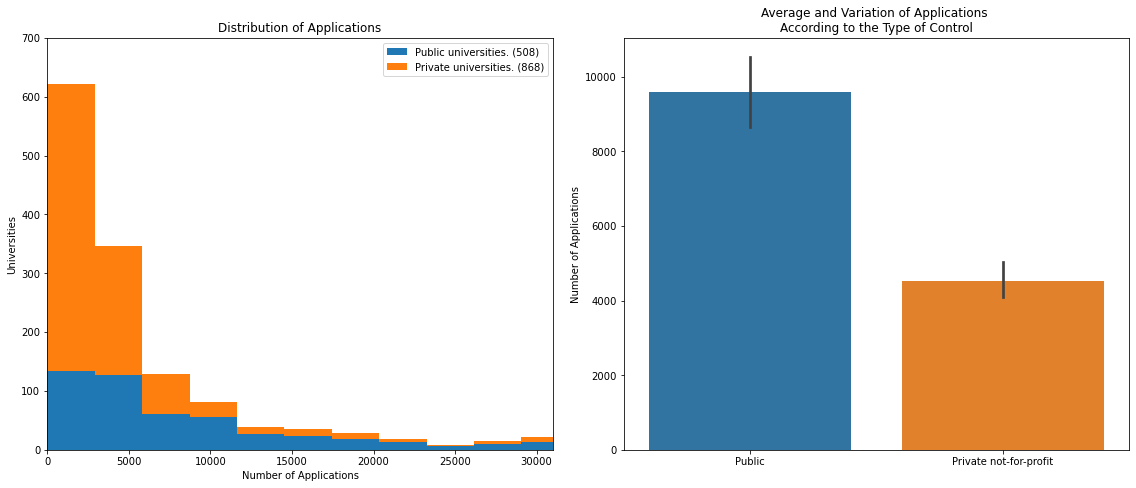

In [62]:
plt.figure(figsize=(16,7))

plt.subplot(1,2,1)
plt.hist([uni_public_df.Applicants_total,uni_private_df.Applicants_total],stacked=True,bins=25)
plt.axis([0,31000,0,700])
plt.title('Distribution of Applications')
plt.xlabel('Number of Applications')
plt.ylabel('Universities')
plt.legend(['Public universities. ({})'.format(len(uni_public_df)),'Private universities. ({})'.format(len(uni_private_df))]);

plt.subplot(1,2,2)
sns.barplot(x=universitiesnw_df.Control_of_institution,y=universitiesnw_df.Applicants_total);
plt.title('''Average and Variation of Applications 
According to the Type of Control''')
plt.xlabel('')
plt.ylabel('Number of Applications');
plt.tight_layout(pad=1.5)

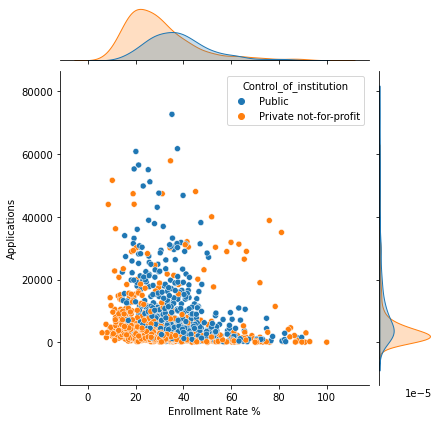

In [63]:
g=sns.jointplot(x=universitiesnw_df.enrollment_rate,y=universitiesnw_df.Applicants_total,hue=universitiesnw_df.Control_of_institution,height=6);
g=(g.set_axis_labels("Enrollment Rate %","Applications"));

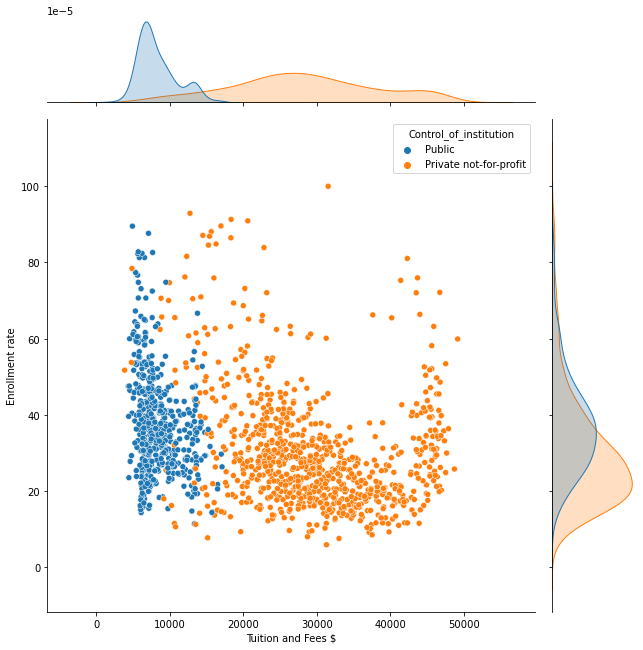

In [64]:
g=sns.jointplot(x=universitiesnw_df.Tuition_and_fees_2013_14,y=universitiesnw_df.enrollment_rate,hue=universitiesnw_df.Control_of_institution,height=9);
g=(g.set_axis_labels('Tuition and Fees $','Enrollment rate'))